In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
import os
os.chdir('C:\\Users\\Acer_owner\\Desktop\\Project')

In [2]:
data = pd.read_csv('IBM Attrition Data.csv')

In [3]:
data.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


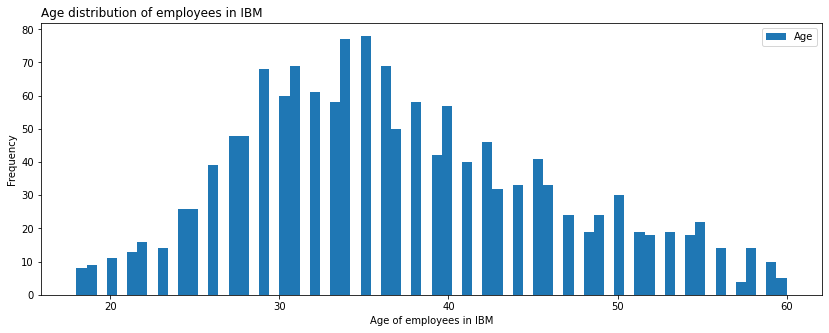

In [4]:
#Find the age distribution of employees in IBM
plt.figure(figsize=(14,5))
data['Age'].plot(kind='hist',bins=70)
plt.xlabel('Age of employees in IBM')
plt.title('Age distribution of employees in IBM',loc='left')
plt.legend(loc='upper right')
plt.show()

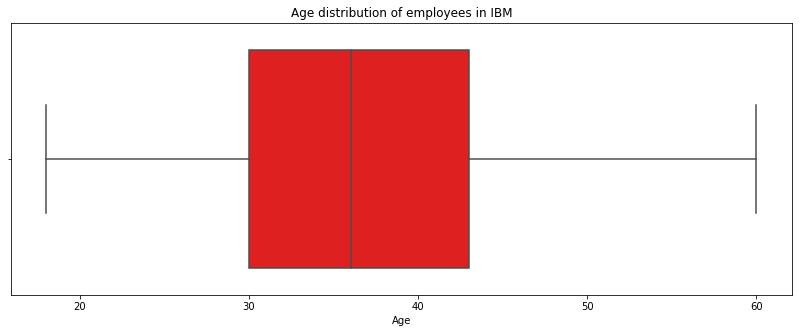

In [5]:
#Age Distribution using boxplot
plt.figure(figsize=(14,5))
sns.boxplot(data=data,x = 'Age',color='red')
plt.title('Age distribution of employees in IBM')
plt.show()

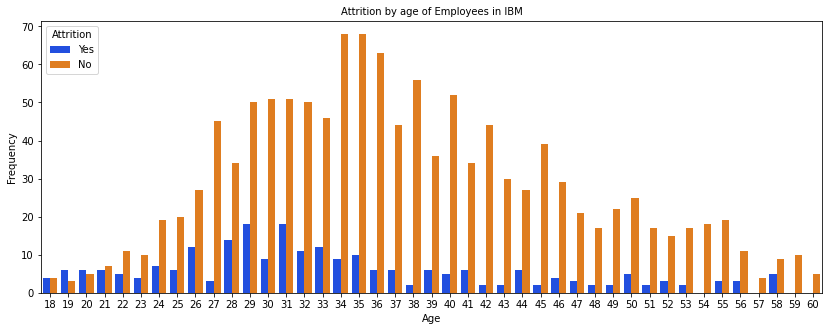

In [6]:
#Explore attrition by age
plt.figure(figsize=(14,5))
sns.countplot(x=data['Age'],hue=data['Attrition'],palette='bright')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Attrition by age of Employees in IBM',size=10)
plt.show()

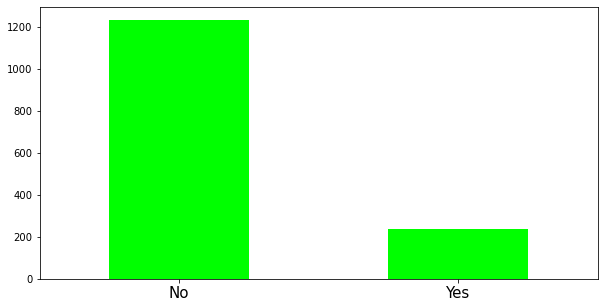

     Attrition
No        1233
Yes        237
237 Employees left IBM


In [7]:
#Explore data for Left employees
plt.figure(figsize=(10,5))
data.Attrition.value_counts().plot(kind='bar',color = 'lime')
plt.xticks(size=15,rotation = 360)
plt.show()
print(data.Attrition.value_counts().to_frame())
print('237 Employees left IBM')

                  EducationField
Life Sciences                606
Medical                      464
Marketing                    159
Technical Degree             132
Other                         82
Human Resources               27


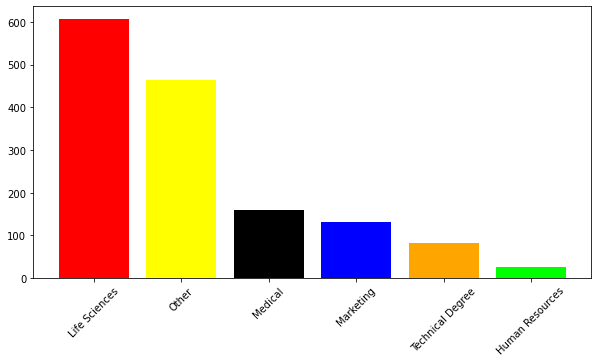

In [8]:
#Find out the distribution of employees by the education field
plt.figure(figsize=(10,5))
c = ['red', 'yellow', 'black', 'blue', 'orange','lime']
plt.bar(data.EducationField.unique(),data.EducationField.value_counts(),color = c)
plt.xticks(rotation=45)
print(data.EducationField.value_counts().to_frame())
plt.show()

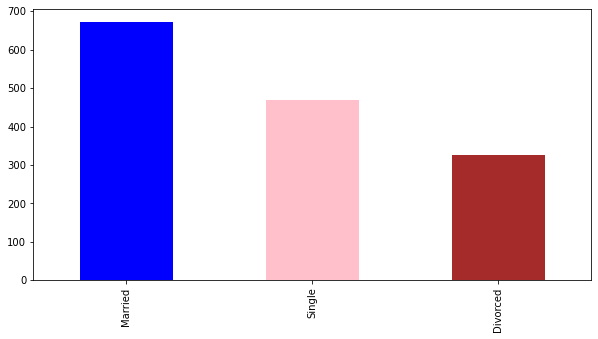

          MaritalStatus
Married             673
Single              470
Divorced            327


In [9]:
#Give a bar chart for the number of married and unmarried employees
plt.figure(figsize=(10,5))
c = ['blue','pink','brown']
data.MaritalStatus.value_counts().plot(kind='bar',color=c)
plt.show()
print(data.MaritalStatus.value_counts().to_frame())

In [10]:
#Build up a logistic regression model to predict which employees are likely to attrite.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [11]:
from sklearn.preprocessing import LabelEncoder
for column in data.columns:
    if data[column].dtype == object:
        data[column] = LabelEncoder().fit_transform(data[column])

In [12]:
data = pd.DataFrame(data,dtype='int64')

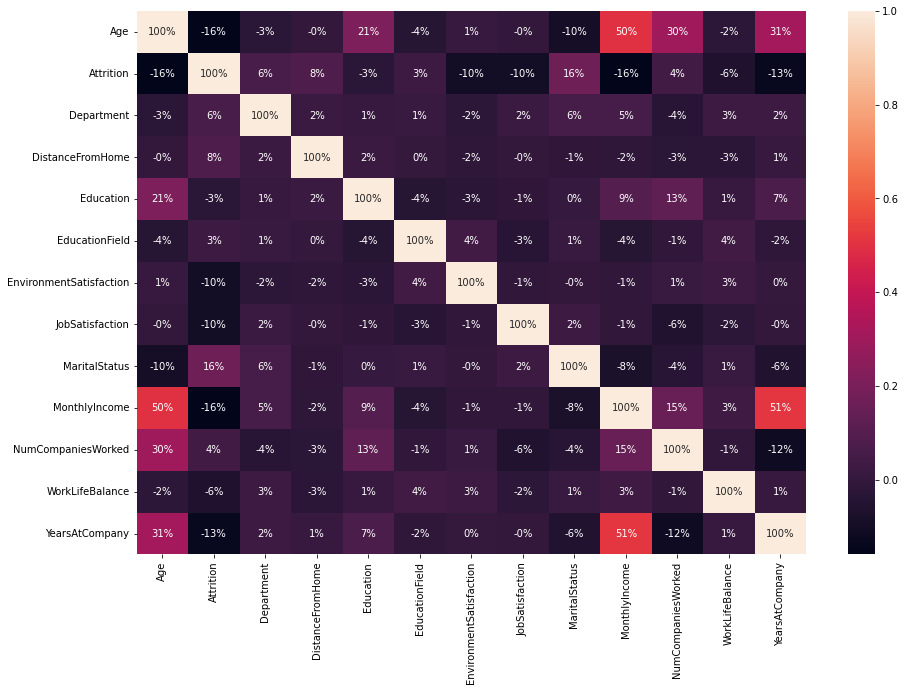

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,fmt='.0%')
plt.show()

In [14]:
data.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [15]:
data = data[['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField','MaritalStatus', 'NumCompaniesWorked', 'YearsAtCompany']]

In [16]:
data 

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,MaritalStatus,NumCompaniesWorked,YearsAtCompany
0,41,1,2,1,2,1,2,8,6
1,49,0,1,8,1,1,1,1,10
2,37,1,1,2,2,4,2,6,0
3,33,0,1,3,4,1,1,1,8
4,27,0,1,2,1,3,1,9,2
...,...,...,...,...,...,...,...,...,...
1465,36,0,1,23,2,3,1,4,5
1466,39,0,1,6,1,3,1,4,7
1467,27,0,1,4,3,1,1,1,6
1468,49,0,2,2,3,3,1,2,9


In [17]:
#LogisticRegression model to predict which employees are likely to attrite.
X = data.drop(columns='Attrition')
Y = data['Attrition']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.25, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
Model = LogisticRegression(max_iter=300)
Model = Model.fit(x_train,y_train)
y_pred = Model.predict(x_test)
print('The logistic Regression has accuracy score of',accuracy_score(y_pred,y_test))

The logistic Regression has accuracy score of 0.845108695652174
